In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math
import calendar

In [5]:
df=pd.read_csv("./xml2csv.csv")

In [6]:
df2=pd.read_csv("./classcsv - classcsv.csv")

In [7]:
df

,nct_id,overall_status,start_date,completion_date,condition,Study design info,eligibility,has_expanded_access,enrollment
0,NCT04453566,Recruiting,"May 27, 2020",December 2020,"COVID-19,Life Satisfaction,Anxiety,Mental Heal...","Other,Retrospective","sampling_method:Probability Sample,gender:All,...",No,120.0
1,NCT04403386,Recruiting,"June 1, 2020","May 31, 2022",COVID-19,"Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,200.0
2,NCT04526977,Not yet recruiting,"September 1, 2020","September 30, 2021","Covid19,Immune Suppression,HIV-1-infection","Case-Control,Cross-Sectional","sampling_method:Non-Probability Sample,gender:...",No,90.0
3,NCT04561102,Enrolling by invitation,"September 11, 2020","December 31, 2020",SARS-CoV-2,"Case-Only,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2500.0
4,NCT04375735,Not yet recruiting,"July 1, 2020","July 1, 2021","ARDS, Human,COVID-19","Randomized,Parallel Assignment,Patients will b...","gender:All,Min Age:18 Years,Max Age:N/A",No,20.0
...,...,...,...,...,...,...,...,...,...
3523,NCT04378803,Completed,"May 13, 2020","August 4, 2020",Well Aging,"Randomized,Crossover Assignment,The wait-list ...","gender:All,Min Age:60 Years,Max Age:95 Years",No,53.0
3524,NCT04352634,Recruiting,"April 26, 2020","December 31, 2021","Covid-19,Mental Health Disorder,Stress Disorde...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2000.0
3525,NCT04356144,Recruiting,"April 15, 2020","December 1, 2020","Disseminated Intravascular Coagulation,Critica...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,60.0
3526,NCT04429763,Not yet recruiting,July 2020,November 2020,COVID-19,"Randomized,Parallel Assignment,It will be incl...","gender:All,Min Age:18 Years,Max Age:79 Years",No,30.0


In [8]:
df2

,nct_id,condition,facility_name,city,sampling_method,overall_status,study_type
0,NCT04357457,Covid 19|Hypoxemic Respiratory Failure|,Hospital Pitié-Salpêtrière,Paris,NaN,Recruiting,Interventional
1,NCT04568005,Lymphedema|,Fatih Sultan Mehmet Training and Research Hosp...,Istanbul,Non-Probability Sample,Completed,Observational [Patient Registry]
2,NCT04351347,COVID|,Tanta University,Tanta,NaN,Recruiting,Interventional
3,NCT04389450,COVID|ARDS|,University of California Irvine,Irvine,NaN,Recruiting,Interventional
4,NCT04298814,COVID-19|Endotracheal Intubation|,Tongji Hospital,Wuhan,Non-Probability Sample,Withdrawn,Observational
...,...,...,...,...,...,...,...
3527,NCT04486404,Acute Stress Disorder|,Pontificia Universidad Católica de Chile,Santiago,Non-Probability Sample,Enrolling by invitation,Observational
3528,NCT04539795,Covid19|,UAB Lung Health Center,Birmingham,NaN,Not yet recruiting,Interventional
3529,NCT04359264,COVID-19|,Municipality of Assiginack Family Health Team,Assiginack,NaN,"Active, not recruiting",Interventional
3530,NCT04402853,Sars-CoV2|Tear|,ASST Sette Laghi,Varese,Probability Sample,Completed,Observational


In [ ]:
#as the date is in series formatneed to convert it into timeso as to do some manipulations

In [9]:
type(df["start_date"])

pandas.core.series.Series

In [10]:
df["start_date"]=pd.to_datetime(df["start_date"])

In [11]:
df["completion_date"]=pd.to_datetime(df["completion_date"])

In [ ]:
#created new data frame from existing one and added months comlumn

In [12]:
test4=df
test4['month'] = pd.DatetimeIndex(df['start_date']).month

In [11]:
#lets look at test4

In [176]:
test4

,nct_id,overall_status,start_date,completion_date,condition,Study design info,eligibility,has_expanded_access,enrollment,month,sum,counts
0,NCT04453566,Recruiting,2020-05-27,2020-12-01,"covid-19,life satisfaction,anxiety,mental heal...","Other,Retrospective","sampling_method:Probability Sample,gender:All,...",No,120.0,5.0,"COVID-19,Lung Infection",NaN
1,NCT04403386,Recruiting,2020-06-01,2022-05-31,covid-19,"Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,200.0,6.0,"COVID-19,Lung Infection",NaN
2,NCT04526977,Not yet recruiting,2020-09-01,2021-09-30,"covid19,immune suppression,hiv-1-infection","Case-Control,Cross-Sectional","sampling_method:Non-Probability Sample,gender:...",No,90.0,9.0,"COVID-19,Lung Infection",NaN
3,NCT04561102,Enrolling by invitation,2020-09-11,2020-12-31,sars-cov-2,"Case-Only,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2500.0,9.0,"COVID-19,Lung Infection",NaN
4,NCT04375735,Not yet recruiting,2020-07-01,2021-07-01,"ards, human,covid-19","Randomized,Parallel Assignment,Patients will b...","gender:All,Min Age:18 Years,Max Age:N/A",No,20.0,7.0,"COVID-19,Lung Infection",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3523,NCT04378803,Completed,2020-05-13,2020-08-04,well aging,"Randomized,Crossover Assignment,The wait-list ...","gender:All,Min Age:60 Years,Max Age:95 Years",No,53.0,5.0,"COVID-19,Lung Infection",NaN
3524,NCT04352634,Recruiting,2020-04-26,2021-12-31,"covid-19,mental health disorder,stress disorde...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2000.0,4.0,"COVID-19,Lung Infection",NaN
3525,NCT04356144,Recruiting,2020-04-15,2020-12-01,"disseminated intravascular coagulation,critica...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,60.0,4.0,"COVID-19,Lung Infection",NaN
3526,NCT04429763,Not yet recruiting,2020-07-01,2020-11-01,covid-19,"Randomized,Parallel Assignment,It will be incl...","gender:All,Min Age:18 Years,Max Age:79 Years",No,30.0,7.0,"COVID-19,Lung Infection",NaN


In [ ]:
#counting no. of trials in each month starting from 1st Jan 2020 to 31 Dec 2020

In [14]:
trial_count=test4["month"][( test4["start_date"] <'2020-12-31') 
                           & ( test4["start_date"] > '2020-01-01' )
                          ].value_counts()

In [15]:
trial_count

4.0     807
5.0     617
6.0     466
3.0     355
7.0     353
9.0     305
8.0     251
10.0    127
2.0      78
11.0     38
12.0     24
1.0      21
Name: month, dtype: int64

Recruiting                 1838
Not yet recruiting          839
Completed                   393
Active, not recruiting      233
Enrolling by invitation     115
Withdrawn                    48
Terminated                   20
Available                    19
Suspended                    19
No longer available           3
Approved for marketing        1
Name: overall_status, dtype: int64

In [68]:
def make_count():
    x=trial_count.keys()
    fig,ax=plt.subplots(figsize=(10,5) )
    mon=['Jan','Feb','Mar','Apr','May',
         'Jun','Jul','Aug','Sep','Oct',
         'Nov','Dev']
    ax.set_xlim(xmin=0,xmax=13)
    z=ax.bar(x,trial_count,label='No. of Trials')
    ax.set_title("Clinical Trials in 2020")
    ax.set_xlabel("Jan 2020 - December 2020")
    ax.set_ylabel("No. of Trials")
    ax.set_xticks(np.arange(1,13,1))
    ax.set_xticklabels(mon)
    ax.legend(loc="upper right")
    totals=[]
    for i in ax.patches:
        totals.append(i.get_width())
    total=sum(totals)
    count=0
    for i in ax.patches:
        ax.text(i.get_x()+.1,i.get_y()+i.get_height()+5,
               str(round((i.get_height()),2)),fontsize=13,
               color='green')
    

    

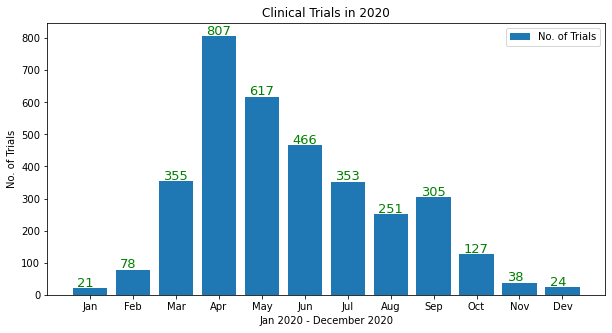

In [69]:
make_count()

In [20]:
counts=df2["study_type"].value_counts()
counts

Interventional                      1998
Observational                       1306
Observational [Patient Registry]     204
Expanded Access                       24
Name: study_type, dtype: int64

df2

In [175]:
df2

,nct_id,condition,facility_name,city,sampling_method,overall_status,study_type
0,NCT04357457,Covid 19|Hypoxemic Respiratory Failure|,Hospital Pitié-Salpêtrière,Paris,NaN,Recruiting,Interventional
1,NCT04568005,Lymphedema|,Fatih Sultan Mehmet Training and Research Hosp...,Istanbul,Non-Probability Sample,Completed,Observational [Patient Registry]
2,NCT04351347,COVID|,Tanta University,Tanta,NaN,Recruiting,Interventional
3,NCT04389450,COVID|ARDS|,University of California Irvine,Irvine,NaN,Recruiting,Interventional
4,NCT04298814,COVID-19|Endotracheal Intubation|,Tongji Hospital,Wuhan,Non-Probability Sample,Withdrawn,Observational
...,...,...,...,...,...,...,...
3527,NCT04486404,Acute Stress Disorder|,Pontificia Universidad Católica de Chile,Santiago,Non-Probability Sample,Enrolling by invitation,Observational
3528,NCT04539795,Covid19|,UAB Lung Health Center,Birmingham,NaN,Not yet recruiting,Interventional
3529,NCT04359264,COVID-19|,Municipality of Assiginack Family Health Team,Assiginack,NaN,"Active, not recruiting",Interventional
3530,NCT04402853,Sars-CoV2|Tear|,ASST Sette Laghi,Varese,Probability Sample,Completed,Observational


In [70]:
def make_studytype():
    fig,ax=plt.subplots()
    ax.barh(counts.index,counts)
    ax.set_title("study types")
    ax.set_xlabel("No. of studies")

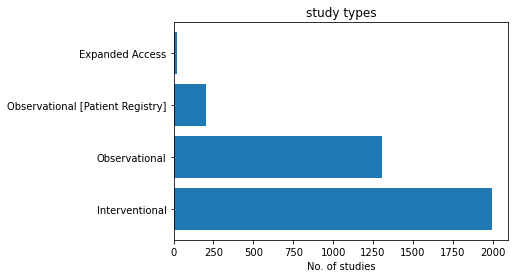

In [71]:
make_studytype()

Interventional                      1998
Observational                       1306
Observational [Patient Registry]     204
Expanded Access                       24
Name: study_type, dtype: int64

In [153]:
tester=df
tester['condition']=df["condition"].str.lower()
#label=tester["condition"].unique()
#newdf=tester[tester[x for x in label]

In [178]:
combdf=pd.DataFrame()

In [179]:
combdf["city"]=df2['city']

In [24]:
res=pd.merge(df,df2,on='nct_id')

In [25]:
label=res["city"].unique()

In [27]:
label

array(['Istanbul', 'Bethesda', nan, 'Winter Park', 'Miami', 'Aurora',
       'Palo Alto', 'London', 'Manaus', 'Madison', 'Bishkek', 'Mulhouse',
       'Bilbao', 'Denver', 'Praha', 'Colombes', 'Aguascalientes',
       'Berlin', 'Birmingham', 'Orlando', 'São Paulo', 'Athens',
       'Atlanta', 'New York', 'Jakarta Pusat', 'Pudong', 'Rawalpindi',
       'Buenos Aires', 'Lyon', 'Little Rock', 'Montreal', 'Detroit',
       'Catanzaro', 'San Lorenzo De El Escorial', 'Saint Louis',
       'Boulogne', 'Tehran', 'Milano', 'Paris', 'Amsterdam', 'Roma',
       'Oxford', 'Kayseri', 'Zurich', 'Doha', "Xi'an", 'Jerusalem',
       'Valencia', 'Belo Horizonte', 'Mexico City', 'Lahore',
       'Strasbourg', 'Murcia', 'Kuala Lumpur', 'Caen', 'Faro', 'Padova',
       'Wenzhou', 'Chengdu', 'Madrid', 'Liverpool', 'Xuzhou', 'Nîmes',
       'Duarte', 'Umuahia', 'Valladolid', 'Angers', 'Oslo', 'Pau',
       'Assiut', 'San Francisco', 'Konya', 'Seoul', 'Erzincan', 'Cairo',
       'General Juan Madariaga', 'Sin

In [184]:
res

,nct_id,overall_status_x,start_date,completion_date,condition_x,Study design info,eligibility,has_expanded_access,enrollment,month,sum,counts,condition_y,facility_name,city,sampling_method,overall_status_y,study_type
0,NCT04453566,Recruiting,2020-05-27,2020-12-01,"covid-19,life satisfaction,anxiety,mental heal...","Other,Retrospective","sampling_method:Probability Sample,gender:All,...",No,120.0,5.0,"COVID-19,Lung Infection",NaN,COVID-19|Life Satisfaction|Anxiety|Mental Heal...,Uskudar University,Istanbul,Probability Sample,Recruiting,Observational
1,NCT04403386,Recruiting,2020-06-01,2022-05-31,covid-19,"Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,200.0,6.0,"COVID-19,Lung Infection",NaN,COVID-19|,National Institutes of Health Clinical Center,Bethesda,Non-Probability Sample,Recruiting,Observational
2,NCT04526977,Not yet recruiting,2020-09-01,2021-09-30,"covid19,immune suppression,hiv-1-infection","Case-Control,Cross-Sectional","sampling_method:Non-Probability Sample,gender:...",No,90.0,9.0,"COVID-19,Lung Infection",NaN,Covid19|Immune Suppression|HIV-1-infection|,NaN,NaN,Non-Probability Sample,Not yet recruiting,Observational
3,NCT04561102,Enrolling by invitation,2020-09-11,2020-12-31,sars-cov-2,"Case-Only,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2500.0,9.0,"COVID-19,Lung Infection",NaN,SARS-CoV-2|,Rollins College Alfonds Sports Center,Winter Park,Non-Probability Sample,Enrolling by invitation,Observational
4,NCT04375735,Not yet recruiting,2020-07-01,2021-07-01,"ards, human,covid-19","Randomized,Parallel Assignment,Patients will b...","gender:All,Min Age:18 Years,Max Age:N/A",No,20.0,7.0,"COVID-19,Lung Infection",NaN,"ARDS, Human|COVID-19|",NaN,NaN,NaN,Not yet recruiting,Interventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,NCT04378803,Completed,2020-05-13,2020-08-04,well aging,"Randomized,Crossover Assignment,The wait-list ...","gender:All,Min Age:60 Years,Max Age:95 Years",No,53.0,5.0,"COVID-19,Lung Infection",NaN,Well Aging|,University of Miami,Coral Gables,NaN,Completed,Interventional
3524,NCT04352634,Recruiting,2020-04-26,2021-12-31,"covid-19,mental health disorder,stress disorde...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2000.0,4.0,"COVID-19,Lung Infection",NaN,Covid-19|Mental Health Disorder|Stress Disorde...,Columbia University,New York,Non-Probability Sample,Recruiting,Observational
3525,NCT04356144,Recruiting,2020-04-15,2020-12-01,"disseminated intravascular coagulation,critica...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,60.0,4.0,"COVID-19,Lung Infection",NaN,Disseminated Intravascular Coagulation|Critica...,Medical University Vienna,Vienna,Non-Probability Sample,Recruiting,Observational
3526,NCT04429763,Not yet recruiting,2020-07-01,2020-11-01,covid-19,"Randomized,Parallel Assignment,It will be incl...","gender:All,Min Age:18 Years,Max Age:79 Years",No,30.0,7.0,"COVID-19,Lung Infection",NaN,COVID-19|,NaN,NaN,NaN,Not yet recruiting,Interventional


In [213]:
city_count=np.zeros(label.shape)

c=res["study_type"].unique()
for i,x in enumerate(label):
    
    city_count[i]=res.loc[res['city']==x,'enrollment'].sum()
    

In [204]:
df2["study_type"].unique()

array(['Interventional', 'Observational [Patient Registry]',
       'Observational', 'Expanded Access'], dtype=object)

In [37]:
city_count[1]

143690.0

In [88]:
test9=df

In [154]:
label

array(['covid-19,life satisfaction,anxiety,mental health wellness 1,athlete,stress',
       'covid-19', 'covid19,immune suppression,hiv-1-infection', ...,
       'well aging',
       'covid-19,mental health disorder,stress disorder,anxiety,depression,sars-cov-2',
       'disseminated intravascular coagulation,critical illness,sars-cov2,viral infection,coagulation disorder, blood,covid19'],
      dtype=object)

In [116]:
z

array([1.2000000e+02, 1.4101111e+07, 9.0000000e+01, ..., 5.3000000e+01,
       2.0000000e+03, 6.0000000e+01])

In [117]:
z[1]

14101111.0

In [118]:
z.shape

(1849,)

In [38]:
dummy=pd.DataFrame()

In [39]:
dummy['city']=[x for x in label]

In [40]:
dummy['sum']=[x for x in city_count]

In [41]:
dummy

,city,sum
0,Istanbul,119525.0
1,Bethesda,143690.0
2,NaN,0.0
3,Winter Park,2500.0
4,Miami,2701.0
...,...,...
931,Duesseldorf,600.0
932,Ludwigshafen,4000.0
933,Pierre-Bénite cedex,550.0
934,Damietta,111.0


In [42]:
top5=dummy.sort_values('sum',ascending=False).head(5)
top5

,city,sum
119,Boston,10099982.0
661,İzmir,7882543.0
478,Créteil,6008320.0
271,Hillerød,6000522.0
126,Le Mans,3000134.0


In [53]:
top5.reset_index()

,index,city,sum
0,119,Boston,10099982.0
1,661,İzmir,7882543.0
2,478,Créteil,6008320.0
3,271,Hillerød,6000522.0
4,126,Le Mans,3000134.0


In [55]:
top5['sum'].max()

10099982.0

In [56]:
top5

,city,sum
119,Boston,10099982.0
661,İzmir,7882543.0
478,Créteil,6008320.0
271,Hillerød,6000522.0
126,Le Mans,3000134.0


In [168]:
x=top5['city']
y=top5['sum']

In [60]:
def make_bar():
    fig,ax=plt.subplots()
    ax.barh(top5['city'],top5['sum'])
    ax.set_title("Top 10 trial enrollments")
    ax.set_xlabel("No. of people")
    ax.set_xlim(xmin=100,xmax=(top5['sum'].max()+10000))

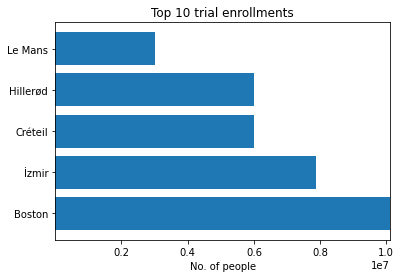

In [62]:
make_bar()

In [63]:
def make_stack():
    x=top5['city']
    y=top5['sum']
    color_map = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
    #blockPrint()
    fig, ax=plt.subplots(figsize=(15,5))
    plt.plot([],[],color='c',label=' İzmir',linewidth=5)
    plt.plot([],[],color='r',label='Créteil',linewidth=5)
    plt.plot([],[],color='k',label='Hillerød',linewidth=5)
    plt.plot([],[],color='b',label='Le Mans',linewidth=5)
    plt.plot([],[],color='m',label='boston',linewidth=5)






    ax.stackplot(x,y.iloc[0],y.iloc[1],y.iloc[2],y.iloc[3] ,colors=['m','c','r','k','b'])
    fig.tight_layout()
    label=[0]

    plt.legend()
    plt.show()



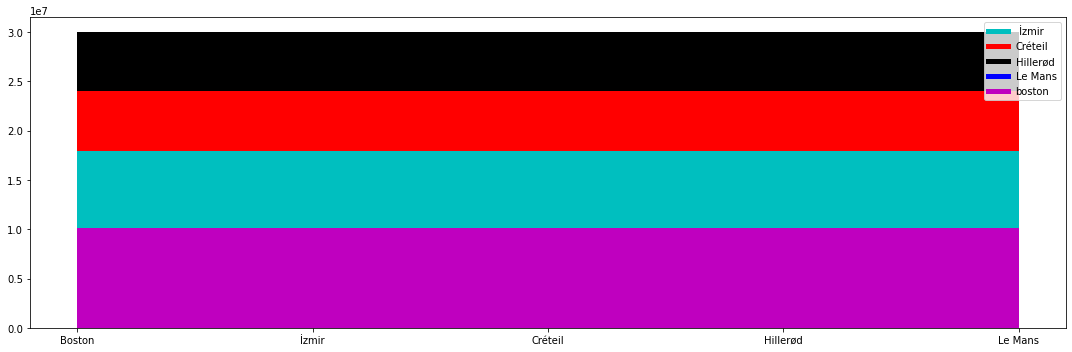

In [64]:
make_stack()

119    10099982.0
661     7882543.0
478     6008320.0
271     6000522.0
126     3000134.0
Name: sum, dtype: float64

In [65]:
def make_pie():
    slices=y.iloc[0:5]
    cities=x.iloc[0:5]
    cols=['m','c','r','k','b']
    fig, ax=plt.subplots(figsize=(30,10))
    plt.pie(slices,labels=cities,colors=cols,startangle=90,shadow=True,autopct='%1.1f%%')
    plt.show()

In [78]:
label

array(['Istanbul', 'Bethesda', nan, 'Winter Park', 'Miami', 'Aurora',
       'Palo Alto', 'London', 'Manaus', 'Madison', 'Bishkek', 'Mulhouse',
       'Bilbao', 'Denver', 'Praha', 'Colombes', 'Aguascalientes',
       'Berlin', 'Birmingham', 'Orlando', 'São Paulo', 'Athens',
       'Atlanta', 'New York', 'Jakarta Pusat', 'Pudong', 'Rawalpindi',
       'Buenos Aires', 'Lyon', 'Little Rock', 'Montreal', 'Detroit',
       'Catanzaro', 'San Lorenzo De El Escorial', 'Saint Louis',
       'Boulogne', 'Tehran', 'Milano', 'Paris', 'Amsterdam', 'Roma',
       'Oxford', 'Kayseri', 'Zurich', 'Doha', "Xi'an", 'Jerusalem',
       'Valencia', 'Belo Horizonte', 'Mexico City', 'Lahore',
       'Strasbourg', 'Murcia', 'Kuala Lumpur', 'Caen', 'Faro', 'Padova',
       'Wenzhou', 'Chengdu', 'Madrid', 'Liverpool', 'Xuzhou', 'Nîmes',
       'Duarte', 'Umuahia', 'Valladolid', 'Angers', 'Oslo', 'Pau',
       'Assiut', 'San Francisco', 'Konya', 'Seoul', 'Erzincan', 'Cairo',
       'General Juan Madariaga', 'Sin

In [ ]:
city_count=np.zeros(label.shape)
for i,x in enumerate(label):
    
    city_count[i]=res.loc[res['city']==x,'enrollment'].sum()

In [201]:
#sampling["study_type"]=
zaya=np.zeros(label.shape)
for i,cities in enumerate(x):
    zaya.loc[i]=res[res["city"]==cities]["sampling_method"]

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [167]:
x

Series([], Name: overall_status, dtype: int64)

In [235]:
y

4.0     471
5.0     362
6.0     272
7.0     208
3.0     168
8.0     133
9.0     120
2.0      33
10.0     23
1.0      12
11.0      1
Name: month, dtype: int64

In [233]:
print(type(x))


<class 'pandas.core.series.Series'>


In [223]:
x.shape

(12,)

In [224]:
y.shape

(11,)

In [226]:
z.shape

(12,)

In [200]:
#f=pd.DataFrame()
x1=df2["overall_status"][( df2["city"] =='Boston')].value_counts()
x2=df2["overall_status"][( df2["city"] =='İzmir')].value_counts()
x3=df2["overall_status"][( df2["city"] =='Créteil')].value_counts()
x4=df2["overall_status"][( df2["city"] =='Hillerød')].value_counts()
x5=df2["overall_status"][( df2["city"] =='Le Mans')].value_counts()
dfs=[]
for i,cities in enumerate(x):
    v=df2["overall_status"][( df2["city"] ==cities)].value_counts()
    
print(x1)
print(x2)
print(x3)
print(x4)

Recruiting                 17
Active, not recruiting      5
Not yet recruiting          4
Enrolling by invitation     4
Completed                   2
Terminated                  1
Withdrawn                   1
Name: overall_status, dtype: int64
Completed                 1
Active, not recruiting    1
Name: overall_status, dtype: int64
Recruiting                3
Not yet recruiting        2
Active, not recruiting    1
Name: overall_status, dtype: int64
Recruiting    3
Completed     1
Name: overall_status, dtype: int64


In [191]:
print(df2["overall_status"][( df2["city"] =='boston')].value_counts())

Series([], Name: overall_status, dtype: int64)


In [181]:
df2["overall_status"][( df2["city"] =='boston')].value_counts()

Series([], Name: overall_status, dtype: int64)

In [146]:
x

""


In [144]:
x.keys()


Index([], dtype='object')

In [140]:
x.keys

<bound method Series.keys of Recruiting    2
Name: overall_status, dtype: int64>

In [126]:
zaya

Recruiting    2
Name: overall_status, dtype: int64

In [118]:
f

Recruiting    2
Name: overall_status, dtype: int64

In [108]:
df2["overall_status"].value_counts()

Recruiting                 1839
Not yet recruiting          841
Completed                   393
Active, not recruiting      233
Enrolling by invitation     115
Withdrawn                    48
Terminated                   20
Available                    19
Suspended                    19
No longer available           4
Approved for marketing        1
Name: overall_status, dtype: int64

In [110]:
for city in x:
    for 
    df2['city'].value_counts()

Paris                    65
Istanbul                 58
London                   55
New York                 55
Cairo                    43
                         ..
Halle                     1
Lyon 4                    1
Cornellà De Llobregat     1
Colorado Springs          1
Pilar                     1
Name: city, Length: 936, dtype: int64

In [105]:
final

,sampling method
769,NaN
824,NaN
965,NaN
1015,NaN
1423,NaN
1668,NaN
2377,NaN
2573,NaN
2583,NaN
2674,NaN


In [93]:
final

164                   NaN
169    Probability Sample
Name: sampling_method, dtype: object

In [244]:
y_status.keys()

Index(['Recruiting', 'Not yet recruiting', 'Completed',
       'Active, not recruiting', 'Enrolling by invitation', 'Withdrawn',
       'Terminated', 'Available', 'Suspended', 'No longer available',
       'Approved for marketing'],
      dtype='object')

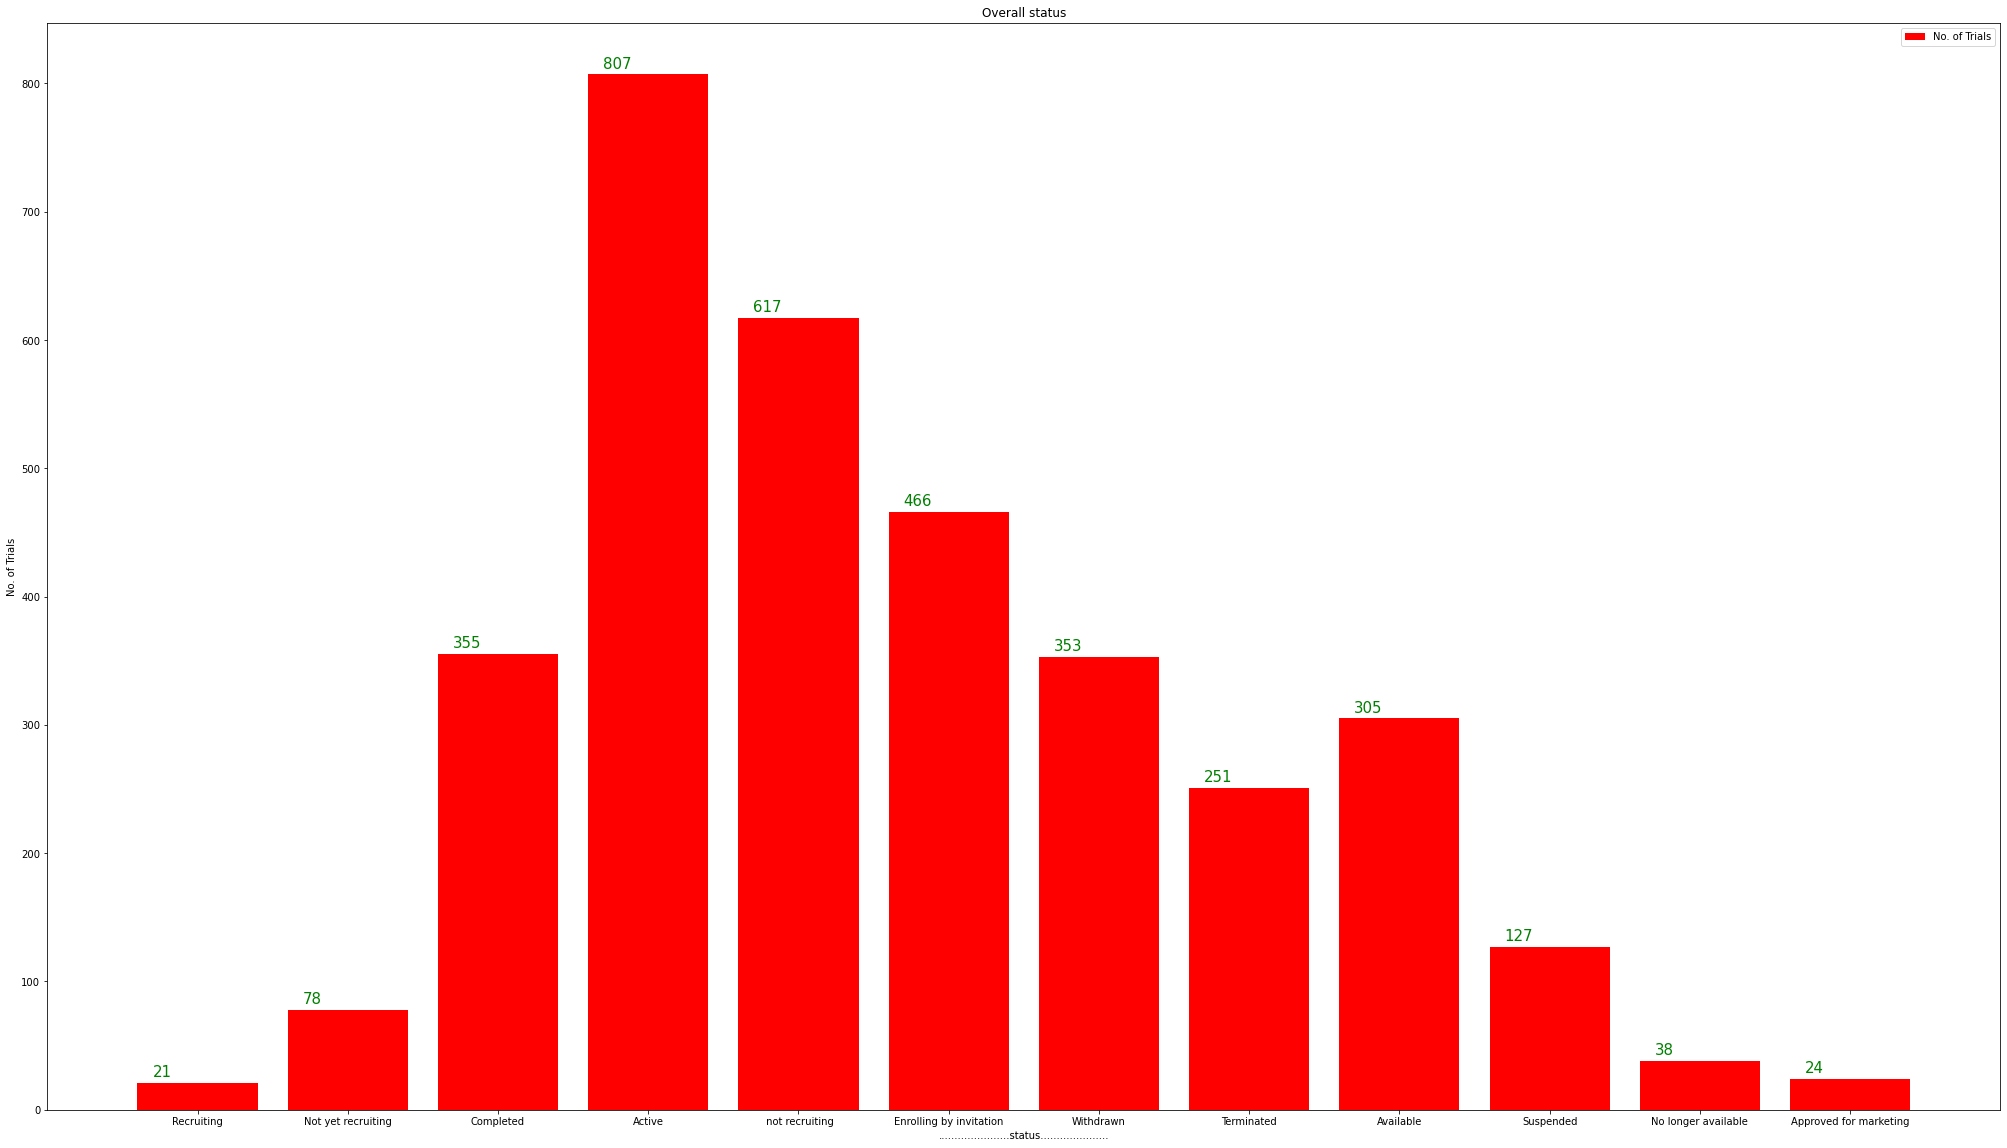

In [269]:
 def status_cal():
    y_status=test4['overall_status'].value_counts()
    y_keys=y_status.keys()
    x=trial_count.keys()
    fig,ax=plt.subplots(figsize=(35,20) )
    mon=['Recruiting', 'Not yet recruiting', 'Completed',
       'Active',' not recruiting', 'Enrolling by invitation', 'Withdrawn',
       'Terminated', 'Available', 'Suspended', 'No longer available',
       'Approved for marketing']
    ax.set_xlim(xmin=0,xmax=13)
    z=ax.bar(x,trial_count,label='No. of Trials',color='red')
    ax.set_title("Overall status")
    ax.set_xlabel("......................status.....................")
    ax.set_ylabel("No. of Trials")
    ax.set_xticks(np.arange(1,13,1))
    ax.set_xticklabels(mon)
    ax.legend(loc="upper right")
    totals=[]
    for i in ax.patches:
        totals.append(i.get_width())
    total=sum(totals)
    count=0
    for i in ax.patches:
        ax.text(i.get_x()+.1,i.get_y()+i.get_height()+5,
               str(round((i.get_height()),2)),fontsize=15,
               color='green')
status_cal() 

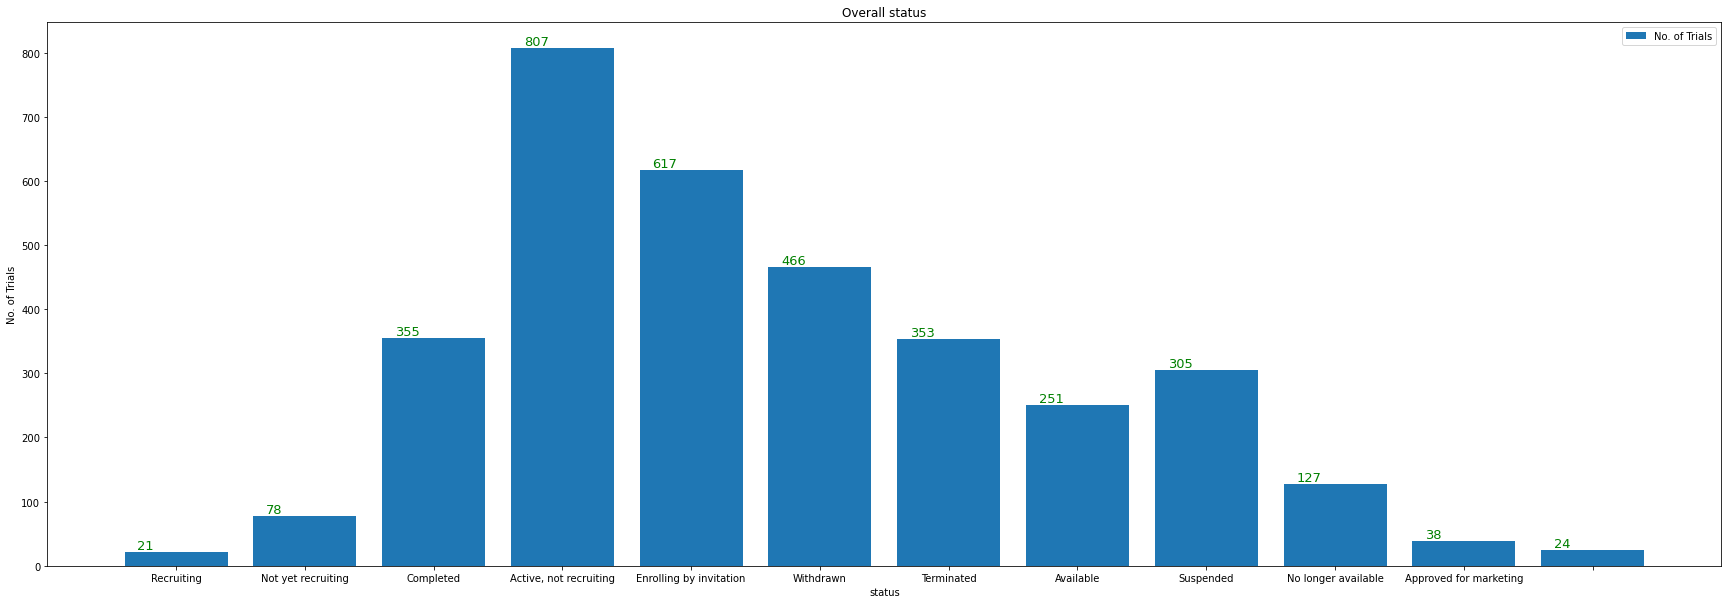

In [243]:
y_keys

Index(['Recruiting', 'Not yet recruiting', 'Completed',
       'Active, not recruiting', 'Enrolling by invitation', 'Withdrawn',
       'Terminated', 'Available', 'Suspended', 'No longer available',
       'Approved for marketing'],
      dtype='object')

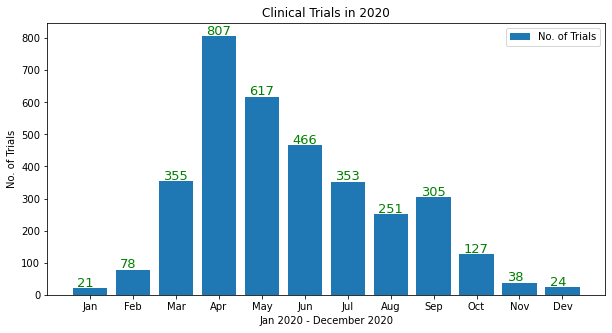

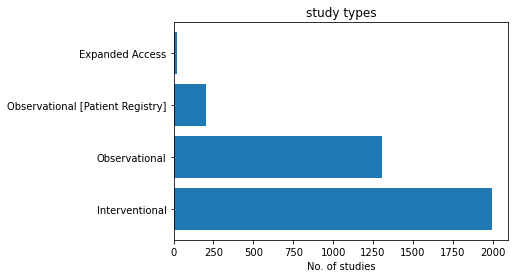

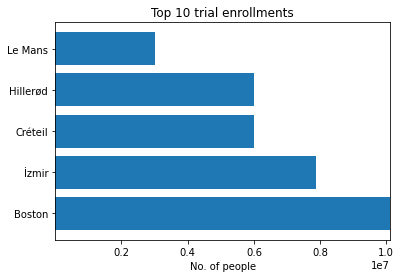

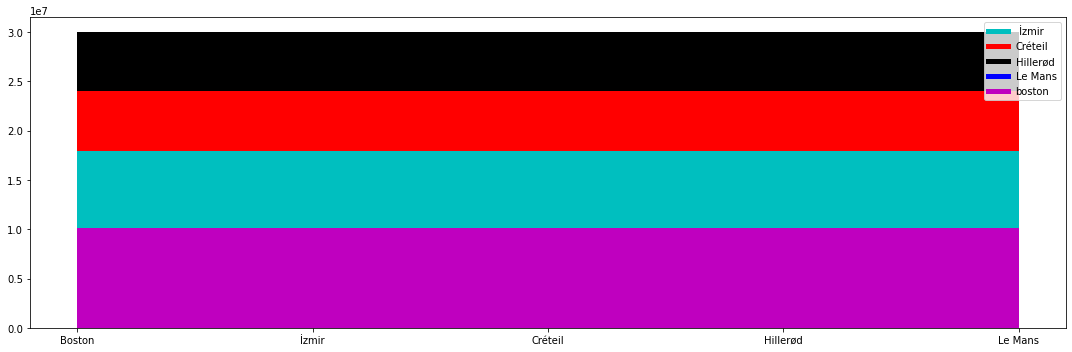

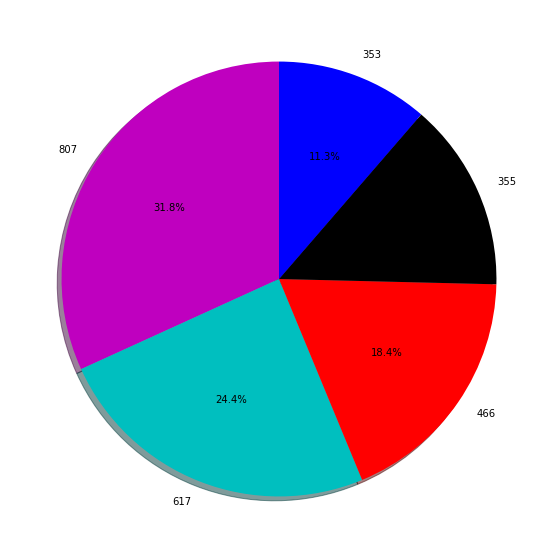

NameError: name 'status_call' is not defined

In [271]:
make_count()
make_studytype()
make_bar()
make_stack()
make_pie()
status_call()

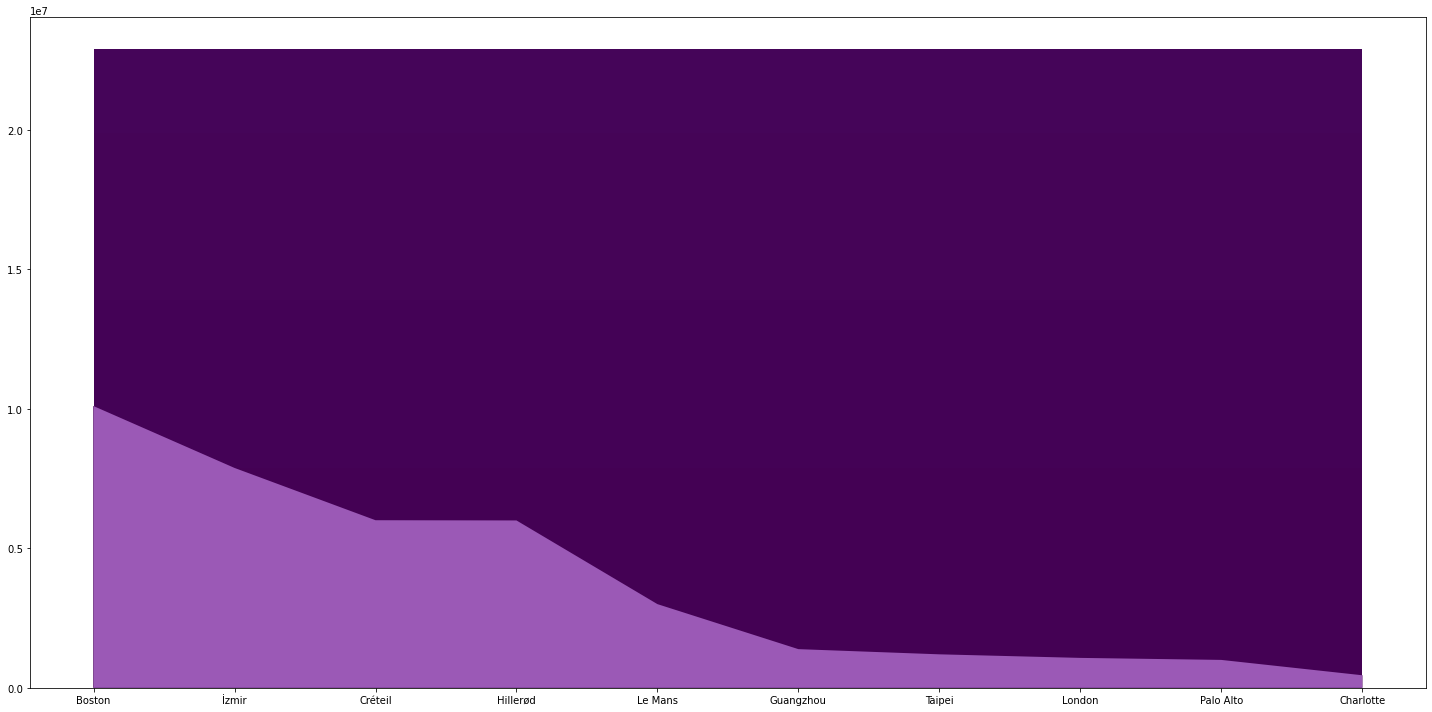

(0.0, 10099982.0)

In [295]:
fig.tight_layout()

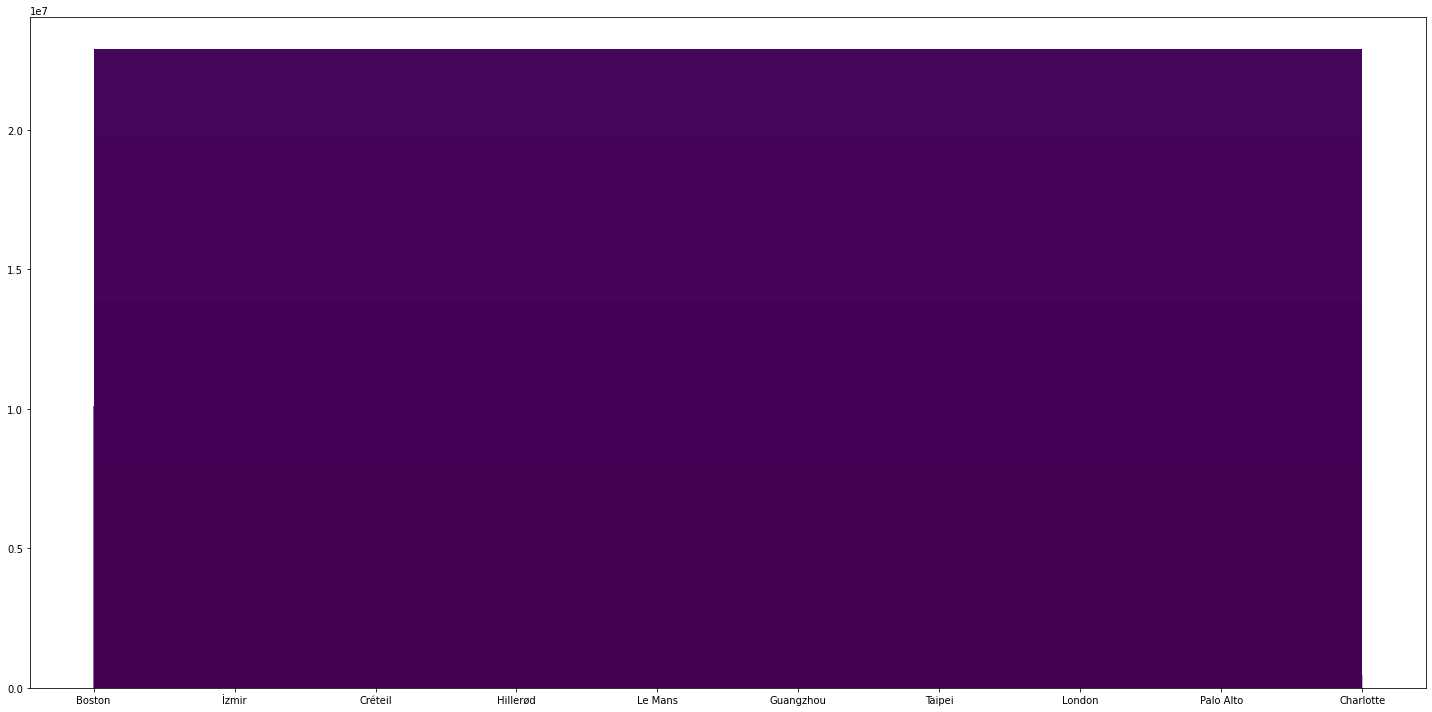

In [296]:
fig

In [113]:
label.shape

(1849,)

In [105]:
z

60.0

In [103]:
z

60.0

In [99]:
x.shape


()

In [89]:
test9.set_index(["condition"]).count(level="enrollment")

TypeError: Can only count levels on hierarchical index.

In [53]:
test9["sum"]=0

In [83]:
test9["condition"][test9["enrollment"]].value_counts()

COVID-19                                                           372
SARS (Severe Acute Respiratory Syndrome),COVID-19                  236
COVID-19,ICU Acquired Weakness,Weaning Failure                     178
Covid19                                                            134
Severe COVID-19 Pneumonia                                          117
                                                                  ... 
Depression,Burnout, Professional,Post Traumatic Stress Disorder      1
Covid19,Ultrasound,ARDS                                              1
COVID-19,Convalescence                                               1
Infertility, Female,ART,IVF,COVID-19                                 1
Colo-rectal Cancer,Colon Cancer,Rectal Cancer,Oncology,Surgery       1
Name: condition, Length: 329, dtype: int64

In [82]:
test9

,nct_id,overall_status,start_date,completion_date,condition,Study design info,eligibility,has_expanded_access,enrollment,month,sum,counts
0,NCT04453566,Recruiting,2020-05-27,2020-12-01,"COVID-19,Life Satisfaction,Anxiety,Mental Heal...","Other,Retrospective","sampling_method:Probability Sample,gender:All,...",No,120.0,5.0,"COVID-19,Lung Infection",NaN
1,NCT04403386,Recruiting,2020-06-01,2022-05-31,COVID-19,"Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,200.0,6.0,"COVID-19,Lung Infection",NaN
2,NCT04526977,Not yet recruiting,2020-09-01,2021-09-30,"Covid19,Immune Suppression,HIV-1-infection","Case-Control,Cross-Sectional","sampling_method:Non-Probability Sample,gender:...",No,90.0,9.0,"COVID-19,Lung Infection",NaN
3,NCT04561102,Enrolling by invitation,2020-09-11,2020-12-31,SARS-CoV-2,"Case-Only,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2500.0,9.0,"COVID-19,Lung Infection",NaN
4,NCT04375735,Not yet recruiting,2020-07-01,2021-07-01,"ARDS, Human,COVID-19","Randomized,Parallel Assignment,Patients will b...","gender:All,Min Age:18 Years,Max Age:N/A",No,20.0,7.0,"COVID-19,Lung Infection",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3523,NCT04378803,Completed,2020-05-13,2020-08-04,Well Aging,"Randomized,Crossover Assignment,The wait-list ...","gender:All,Min Age:60 Years,Max Age:95 Years",No,53.0,5.0,"COVID-19,Lung Infection",NaN
3524,NCT04352634,Recruiting,2020-04-26,2021-12-31,"Covid-19,Mental Health Disorder,Stress Disorde...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2000.0,4.0,"COVID-19,Lung Infection",NaN
3525,NCT04356144,Recruiting,2020-04-15,2020-12-01,"Disseminated Intravascular Coagulation,Critica...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,60.0,4.0,"COVID-19,Lung Infection",NaN
3526,NCT04429763,Not yet recruiting,2020-07-01,2020-11-01,COVID-19,"Randomized,Parallel Assignment,It will be incl...","gender:All,Min Age:18 Years,Max Age:79 Years",No,30.0,7.0,"COVID-19,Lung Infection",NaN


In [80]:
test9["counts"]


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3523   NaN
3524   NaN
3525   NaN
3526   NaN
3527   NaN
Name: counts, Length: 3528, dtype: float64

In [74]:
test9

COVID-19                                                           372
SARS (Severe Acute Respiratory Syndrome),COVID-19                  236
COVID-19,ICU Acquired Weakness,Weaning Failure                     178
Covid19                                                            134
Severe COVID-19 Pneumonia                                          117
                                                                  ... 
Depression,Burnout, Professional,Post Traumatic Stress Disorder      1
Covid19,Ultrasound,ARDS                                              1
COVID-19,Convalescence                                               1
Infertility, Female,ART,IVF,COVID-19                                 1
Colo-rectal Cancer,Colon Cancer,Rectal Cancer,Oncology,Surgery       1
Name: condition, Length: 329, dtype: int64

ValueError: Grouper and axis must be same length

In [65]:
g.groups

{'2019 Novel Coronavirus Infection': Int64Index([1151], dtype='int64'),
 '2019 Novel Coronavirus Pneumonia': Int64Index([1866], dtype='int64'),
 '2019 Novel Coronavirus Pneumonia,COVID-19': Int64Index([2990], dtype='int64'),
 '2019 nCoV, PD-1': Int64Index([816], dtype='int64'),
 '2019-nCoV': Int64Index([468, 708, 795, 1046, 1628, 1940, 2814], dtype='int64'),
 '2019-nCoV (COVID-19),Interstitial Pneumonia': Int64Index([1925], dtype='int64'),
 '2019-nCoV Pneumonia': Int64Index([2184], dtype='int64'),
 '2019-nCoV Severe Pneumonia': Int64Index([275], dtype='int64'),
 '2019-nCoV,Immunoglobulin of Cured Patients': Int64Index([2790], dtype='int64'),
 '2019-nCoVs Infection Pneumonia': Int64Index([3251], dtype='int64'),
 'AKI,ARDS,COVID': Int64Index([556], dtype='int64'),
 'ALL, Adult': Int64Index([327], dtype='int64'),
 "AMD, ACEi's/ARB Prevent/Worsen Risk of COVID-19 Infection": Int64Index([1768], dtype='int64'),
 'ARDS': Int64Index([573, 1183], dtype='int64'),
 'ARDS Associated With COVID-19'

In [49]:
test7

array(['COVID-19,Sars-CoV2',
       'COVID-19,ICU Acquired Weakness,Weaning Failure', 'Exercise Test',
       'Pregnancy', 'COVID-19,Psychosocial Stress,Mental Health',
       'Covid19', nan, 'Coronavirus Disease 2019 (COVID-19)', 'COVID-19',
       'Coronavirus,Depression,Anxiety,Stress', 'Deep Venous Thrombosis',
       'Coronavirus Infection', 'COVID-19,SARS-CoV-2',
       'COVID-19,Coronavirus Infection,Sars-CoV2,Complications',
       'Questionnaire Designs,COVID-19 Pandemic,Psychological Stress,Coping Skills,Two-Item Generalised Anxiety Disorder Scale,Patient Health Questionnaire Anxiety and Depression Scale,Health Status Index,Subjective Health Complaint,Mood',
       'Type1diabetes,Covid19',
       'SARS (Severe Acute Respiratory Syndrome),COVID-19',
       'SARS-Cov-2 Induced Pulmonary Fibrosis',
       'Depressive Symptoms,Anxiety,COVID-19',
       'Lower Respiratory Tract Infection,Parainfluenza,Immunocompromised,COVID-19',
       'COVID-19,Life Satisfaction,Anxiety,Mental H

In [ ]:
test4["month"][( test4["start_date"] <'2020-12-31') 
                           & ( test4["start_date"] > '2020-01-01' )
                          ].value_counts()

In [33]:
newdf


0        120.0
1        200.0
2         90.0
3       2500.0
4         20.0
         ...  
3523      53.0
3524    2000.0
3525      60.0
3526      30.0
3527     500.0
Name: enrollment, Length: 3528, dtype: float64

In [25]:
label


array(['COVID-19,Life Satisfaction,Anxiety,Mental Health Wellness 1,Athlete,Stress',
       'COVID-19', 'Covid19,Immune Suppression,HIV-1-infection', ...,
       'Well Aging',
       'Covid-19,Mental Health Disorder,Stress Disorder,Anxiety,Depression,SARS-CoV-2',
       'Disseminated Intravascular Coagulation,Critical Illness,Sars-CoV2,Viral Infection,Coagulation Disorder, Blood,Covid19'],
      dtype=object)

TypeError: 'value' must be an instance of str or bytes, not a float

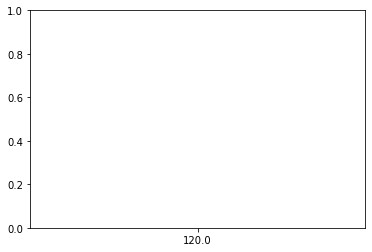

In [ ]:
trial_count.sum()

In [ ]:
test4[test4["month"]==12.0]

In [ ]:
trial_count

In [ ]:
#def findnct(startdate,completiondate):
df.loc[(df["2020-08-19"])]

In [ ]:
test1=df.groupby("condition")

In [ ]:
test1.groups.keys()

In [ ]:
test2=test1.get_group("COVID-19")

In [ ]:
covid=test2["nct_id"].count()

In [ ]:
covid

In [ ]:
noncovid=df[df["condition"]!="COVID-19"]["nct_id"].count()

In [ ]:
noncovid

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))

In [ ]:
plt.plot(df["nct_id"].loc[1:573],test2["nct_id"])

In [ ]:
ax.stackplot(df["nct_id"].loc[1:573],test2["nct_id"])

In [ ]:
fig